In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

load data from CSV files into pandas tables

See the readme file for table structures

In [ ]:
consumption_d = pd.read_csv('./data_tables/consumption_d.csv',index_col=0,parse_dates=0)
consumption_n = pd.read_csv('./data_tables/consumption_n.csv',index_col=0,parse_dates=0)
answers = pd.read_csv('./data_tables/survey_answers.csv', low_memory=False, index_col=0)
questions = pd.read_csv('./data_tables/survey_questions.csv', low_memory=False, index_col=0)
tariff = pd.read_csv('./data_tables/tariff_d.csv',parse_dates=0,index_col=0)

The tariff consumption data is indexed by time stamp. The time stamps are ordered (every 30 minutes, in sequence), but the data structure does not 'know' this yet. The following function constructs a date_range index to replace the originals (but only if they're exactly equal). This allows us to use operators like +1/-1 on the time index.

Also, the original time stamps indicate the end of the 30min intervals. I shift them by -15 mins to coincide with the centre of the interval. 

Finally, because the consumption data represents energy (integrated power consumption over 30 mins), we should really be using 30-minute 'periods' instead of time points in the centre of the periods. However, the period_range object is less well supported than the data_range object, so we'll use time stamps instead.

In [3]:
def fix_time_stamps(df):
    # NOTE: I assume that changes to df.index propagate to the real object!! [pass by reference]
    
    # NOTE: timezones and Periods are not well supported by all functions. Use DateTimes instead, and offset by 15 mins to centre on period.
    dr = pd.date_range(df.index[0],df.index[-1],freq='30min') - pd.to_timedelta('15min')
    # this replacement enables the use of +1 / -1 on the time index
    # might want to replace date_range by period_range to reflect the fact that we're actually talking about intervals

    if (np.all(dr.to_datetime() + pd.to_timedelta('15min') == df.index)):
        # only replace the original index if the original data was indeed ordered.
        df.index = dr
        print('assigned explicit frequency to DateTimeIndex')

# check whether the range (with freq) is equal to the separate time stamps

In [4]:
# IMPORTANT: run this only once every time you load data! 
# Rerunning it will offset the time stamps by another 15 minutes.
fix_time_stamps(consumption_d)
fix_time_stamps(tariff)
fix_time_stamps(consumption_n)

assigned explicit frequency to DateTimeIndex
assigned explicit frequency to DateTimeIndex
assigned explicit frequency to DateTimeIndex


Detect abnormal missing data

In [ ]:
consumption_d['2013'].isnull().sum(axis=0)

In [98]:
consumption_d['2012-12' : '2014-01']

,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D1015,D1016,D1017,D1018,D1019,D1020,D1021,D1022,D1023,D1024
2012-12-01 00:15:00,0.099,0.043,0.252,0.075,0.028,0.196,0.272,0.155,0.323,0.109,...,0.013,0.000,0.257,0.044,0.413,0.071,0.047,0.168,0.104,0.334
2012-12-01 00:45:00,0.067,0.019,0.262,0.075,0.032,0.154,0.268,0.094,0.097,0.099,...,0.016,0.013,0.211,0.064,0.361,0.134,0.056,0.197,0.099,0.080
2012-12-01 01:15:00,0.034,0.054,0.253,0.075,0.021,0.115,0.286,0.084,0.042,0.107,...,0.046,0.052,0.238,0.047,0.321,0.096,0.042,0.130,0.102,0.088
2012-12-01 01:45:00,0.070,0.064,0.263,0.075,0.032,0.090,0.094,0.086,0.073,0.111,...,0.017,0.028,0.144,0.048,0.257,0.044,0.042,0.035,0.122,0.116
2012-12-01 02:15:00,0.031,0.041,0.258,0.075,0.026,0.037,0.046,0.075,0.045,0.082,...,0.051,0.000,0.120,0.059,0.256,0.105,0.060,0.027,0.041,0.085
2012-12-01 02:45:00,0.049,0.067,0.342,0.075,0.027,0.095,0.027,0.073,0.057,0.123,...,0.013,0.000,0.116,0.034,0.241,0.062,0.042,0.030,0.007,0.108
2012-12-01 03:15:00,0.049,0.058,0.296,0.074,0.031,0.049,0.045,0.088,0.061,0.097,...,0.022,0.001,0.089,0.060,0.243,0.061,0.042,0.062,0.007,0.091
2012-12-01 03:45:00,0.088,0.019,0.287,0.077,0.021,0.079,0.027,0.097,0.042,0.105,...,0.058,0.000,0.102,0.051,0.252,0.110,0.053,0.026,0.007,0.090
2012-12-01 04:15:00,0.189,0.035,0.262,0.074,0.032,0.073,0.040,0.073,0.081,0.118,...,0.016,0.000,0.292,0.040,0.233,0.045,0.049,0.097,0.021,0.102
2012-12-01 04:45:00,0.030,0.067,0.249,0.542,0.021,0.054,0.030,0.070,0.041,0.182,...,0.015,0.000,0.245,0.060,0.238,0.066,0.042,0.023,0.034,0.113


select 2013 and interpolate up to 3 hour data gaps

In [134]:
consumption_dip = consumption_d['2012-12' : '2014-01'].interpolate(axis=0, limit=12)['2013']
consumption_nip = consumption_n['2012-12' : '2014-01'].interpolate(axis=0, limit=12)['2013']

select only those households without remaining data gaps

In [135]:
consumption_dipv = consumption_dip.iloc[:,consumption_dip.notnull().all(axis=0).values]
consumption_nipv = consumption_nip.iloc[:,consumption_nip.notnull().all(axis=0).values]

In [138]:
consumption_dipv.sum().mean()

3404.056755579169

In [136]:
consumption_dipv.mean(axis=1).sum()

3404.0567555791736

In [142]:
consumption_dipv.head()

,D0000,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,D0010,...,D1015,D1016,D1017,D1018,D1019,D1020,D1021,D1022,D1023,D1024
2013-01-01 00:15:00,0.404,0.227,0.078,0.202,0.066,0.161,0.137,0.176,0.046,0.016,...,0.032,0.005,0.236,0.054,0.196,0.838,0.081,0.166,0.110,0.058
2013-01-01 00:45:00,0.185,0.231,0.076,0.188,0.057,0.227,0.164,0.187,0.047,0.018,...,0.046,0.005,0.289,0.060,0.218,0.446,0.039,0.145,0.100,0.087
2013-01-01 01:15:00,0.151,0.236,0.077,0.039,0.052,0.138,0.136,0.341,0.075,0.009,...,0.016,0.005,0.239,0.057,0.181,0.410,0.059,0.133,0.234,0.040
2013-01-01 01:45:00,0.139,0.239,0.077,0.024,0.070,0.040,0.103,0.087,0.046,0.008,...,0.016,0.005,0.120,0.263,0.174,0.282,0.049,0.049,0.056,0.083
2013-01-01 02:15:00,0.105,0.251,0.077,0.102,0.038,0.020,0.094,0.063,0.046,0.015,...,0.016,0.005,0.097,0.047,0.188,0.239,0.034,0.039,0.106,0.053


In [104]:
consumption_dip.head()

,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D1015,D1016,D1017,D1018,D1019,D1020,D1021,D1022,D1023,D1024
2013-01-01 00:15:00,0.404,0.248,0.227,0.078,0.202,0.066,0.161,0.137,0.176,0.046,...,0.032,0.005,0.236,0.054,0.196,0.838,0.081,0.166,0.110,0.058
2013-01-01 00:45:00,0.185,0.206,0.231,0.076,0.188,0.057,0.227,0.164,0.187,0.047,...,0.046,0.005,0.289,0.060,0.218,0.446,0.039,0.145,0.100,0.087
2013-01-01 01:15:00,0.151,0.171,0.236,0.077,0.039,0.052,0.138,0.136,0.341,0.075,...,0.016,0.005,0.239,0.057,0.181,0.410,0.059,0.133,0.234,0.040
2013-01-01 01:45:00,0.139,0.068,0.239,0.077,0.024,0.070,0.040,0.103,0.087,0.046,...,0.016,0.005,0.120,0.263,0.174,0.282,0.049,0.049,0.056,0.083
2013-01-01 02:15:00,0.105,0.083,0.251,0.077,0.102,0.038,0.020,0.094,0.063,0.046,...,0.016,0.005,0.097,0.047,0.188,0.239,0.034,0.039,0.106,0.053


In [143]:
consumption_nip.sum().mean()

3533.5624014072373

In [144]:
consumption_nip.mean(axis=1).sum()

3670.519492958001

We will add a 'trial_day' column to the tariff structure.

Note that the definition of trial days is NOT the same as regular days. Trial days start at 5:00am and run until 5:00am the next day. We will define trial day 0 as 31 dec 2012.

In [145]:
trial_start = pd.datetime(2012,12,31,5,0)

trial_day = [(x-trial_start).days for x in tariff.index]

tariff['trial_day'] = trial_day

In [154]:
tariff.head()

,Price,Event_tags,trial_day
2013-01-01 00:15:00,0.1176,NaN,0
2013-01-01 00:45:00,0.1176,NaN,0
2013-01-01 01:15:00,0.1176,NaN,0
2013-01-01 01:45:00,0.1176,NaN,0
2013-01-01 02:15:00,0.1176,NaN,0


In [310]:
def select_label(x):
    if x.first_valid_index() is None:
        return None
    else:
        return x[x.first_valid_index()]

In [311]:
def event_present(day_tariff_data):
    return {'event_day': day_tariff_data.notnull().any(),
           'event_tag': select_label(day_tariff_data)}

In [312]:
event_map = tariff.groupby('trial_day')['Event_tags'].apply(event_present).unstack()
event_map.head()

,event_day,event_tag
trial_day,,
0,False,NaN
1,False,NaN
2,False,NaN
3,False,NaN
4,True,L3


In [5]:
def create_sig(consumption_data):
    return {'data': consumption_data.values }

Note: the following line uses calendar day grouping; no longer used

In [223]:
signatures_d=consumption_d['2013'].mean(axis=1).groupby(pd.Grouper(freq='1d')).apply(create_sig).unstack()
signatures_n=consumption_n['2013'].mean(axis=1).groupby(pd.Grouper(freq='1d')).apply(create_sig).unstack()

In [281]:
mean_data = \
    pd.concat([
            consumption_d['2013-01-01 05:00' : '2014-01-01 05:00'].mean(axis=1).to_frame('mean_d'), 
            consumption_n['2013-01-01 05:00' : '2014-01-01 05:00'].mean(axis=1).to_frame('mean_n'), 
            tariff['trial_day']], 
              axis=1, join='inner')
mean_data.head()

,mean_d,mean_n,trial_day
2013-01-01 05:15:00,0.111545,0.121754,1
2013-01-01 05:45:00,0.111479,0.125786,1
2013-01-01 06:15:00,0.118009,0.134077,1
2013-01-01 06:45:00,0.129285,0.139608,1
2013-01-01 07:15:00,0.136748,0.150102,1


Should be able to merge the following into a single function call, but seem to use the incorrect syntax...

In [313]:
def create_sig_d(consumption_data):
    return {'data_d': consumption_data.values }
def create_sig_n(consumption_data):
    return {'data_n': consumption_data.values }

In [314]:
signatures = pd.concat([ \
                         mean_data.groupby('trial_day')['mean_d'].apply(create_sig_d).unstack(),
                        mean_data.groupby('trial_day')['mean_n'].apply(create_sig_n).unstack(),
                        event_map \
                         ], axis=1, join='inner')

signatures.head()

,data_d,data_n,event_day,event_tag
trial_day,,,,
1,"[0.111544921875, 0.111478515625, 0.11800878906...","[0.121754208754, 0.125786246694, 0.13407694157...",False,NaN
2,"[0.114104492188, 0.119849609375, 0.13632617187...","[0.125018033181, 0.133751142101, 0.15004472228...",False,NaN
3,"[0.111344726563, 0.115592773438, 0.13844335937...","[0.121998076923, 0.136187980769, 0.1515875, 0....",False,NaN
4,"[0.107407226563, 0.114870117187, 0.13250976562...","[0.117905460669, 0.129225884051, 0.14539114746...",True,L3
5,"[0.109760742188, 0.113474609375, 0.12063476562...","[0.116163260399, 0.123659052657, 0.13278913200...",False,NaN


In [318]:
signatures.loc[1]

data_d       [0.111544921875, 0.111478515625, 0.11800878906...
data_n       [0.121754208754, 0.125786246694, 0.13407694157...
event_day                                                False
event_tag                                                  NaN
Name: 1, dtype: object

In [37]:
# extract list of event types, excluding non-events
event_set = [x for x in tariff['Event_tags'].unique() if not pd.isnull(x)]

# create dictionary of associated time stamps
event_time_stamps = {tag: tariff[tariff['Event_tags']==tag].index.get_values() for tag in event_set}
event_set

['L3', 'H3', 'H6', 'CM', 'L6', 'L12', 'L24', 'H12']

The following shows how to use the event_time_stamps dictionary to select particular events (in this case, constraint management (CM) events).

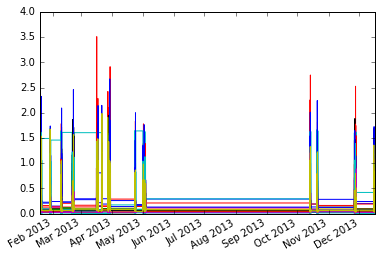

In [38]:
# select all relevant time stamps
CM_time_stamps = event_time_stamps['CM']
# create a subset of all consumption data for the Dtou group
CM_consumption = consumption_d.ix[CM_time_stamps]

# plot the selected consumption data (using the 'step' style) for the first 20 households
# Use .iloc(time, household) to select data
CM_consumption.iloc[:,:20].plot(drawstyle='steps')
# remove the plot legend
plt.legend().remove()

example: select all time stamps that are corresponding to events.

In [39]:
testset = [x for x in tariff.index if not pd.isnull(tariff['Event_tags'].ix[x])]

show how direct date selection works:

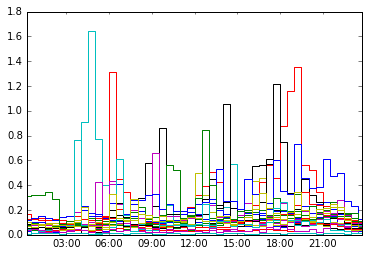

In [40]:
# create c_d_trial with only the data pertaining to the trial year. 
c_d_trial = consumption_d['2013']

# plot data from 1 July 2013, for the first 20 households
c_d_trial['2013-07-1':'2013-07-01'].iloc[:,0:20].plot(drawstyle='steps-mid')
plt.legend().remove()

In [41]:
consumption_d['2013'].head()

,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D1015,D1016,D1017,D1018,D1019,D1020,D1021,D1022,D1023,D1024
2013-01-01 00:15:00,0.404,0.248,0.227,0.078,0.202,0.066,0.161,0.137,0.176,0.046,...,0.032,0.005,0.236,0.054,0.196,0.838,0.081,0.166,0.110,0.058
2013-01-01 00:45:00,0.185,0.206,0.231,0.076,0.188,0.057,0.227,0.164,0.187,0.047,...,0.046,0.005,0.289,0.060,0.218,0.446,0.039,0.145,0.100,0.087
2013-01-01 01:15:00,0.151,0.171,0.236,0.077,0.039,0.052,0.138,0.136,0.341,0.075,...,0.016,0.005,0.239,0.057,0.181,0.410,0.059,0.133,0.234,0.040
2013-01-01 01:45:00,0.139,0.068,0.239,0.077,0.024,0.070,0.040,0.103,0.087,0.046,...,0.016,0.005,0.120,0.263,0.174,0.282,0.049,0.049,0.056,0.083
2013-01-01 02:15:00,0.105,0.083,0.251,0.077,0.102,0.038,0.020,0.094,0.063,0.046,...,0.016,0.005,0.097,0.047,0.188,0.239,0.034,0.039,0.106,0.053


In [42]:
# compute daily average half-hourly energy consumption [in kWh]
bla = c_d_trial.groupby(pd.Grouper(freq='1d'))
bla.sum().head()

,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D1015,D1016,D1017,D1018,D1019,D1020,D1021,D1022,D1023,D1024
2013-01-01,9.309,7.539,12.690,9.525,8.781,5.705,11.448,7.483,9.582,3.563,...,1.271,1.786,11.195,9.111,8.024,13.590,5.812,13.446,2.639,4.368
2013-01-02,5.948,8.180,12.820,9.123,7.605,8.035,16.699,9.782,8.729,9.313,...,2.994,1.670,10.678,7.194,5.710,6.151,3.534,8.175,3.365,7.664
2013-01-03,4.862,5.840,11.894,8.982,9.016,8.658,21.349,12.385,7.226,12.336,...,3.232,1.802,9.232,2.226,5.458,7.742,2.738,6.082,2.486,7.202
2013-01-04,6.998,7.609,11.392,8.884,8.391,6.751,17.846,8.399,9.097,9.771,...,4.829,1.803,9.308,2.192,4.502,9.216,6.502,6.629,3.076,4.234
2013-01-05,3.234,7.196,11.243,10.466,7.549,7.899,13.906,7.740,6.732,11.527,...,2.376,1.791,9.576,2.174,6.787,9.563,8.113,8.229,2.020,6.248


In [56]:
bla2 = c_d_trial.groupby(pd.Grouper(freq='1d'),axis=0)

In [57]:
bla2.sum().head()

,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D1015,D1016,D1017,D1018,D1019,D1020,D1021,D1022,D1023,D1024
2013-01-01,9.309,7.539,12.690,9.525,8.781,5.705,11.448,7.483,9.582,3.563,...,1.271,1.786,11.195,9.111,8.024,13.590,5.812,13.446,2.639,4.368
2013-01-02,5.948,8.180,12.820,9.123,7.605,8.035,16.699,9.782,8.729,9.313,...,2.994,1.670,10.678,7.194,5.710,6.151,3.534,8.175,3.365,7.664
2013-01-03,4.862,5.840,11.894,8.982,9.016,8.658,21.349,12.385,7.226,12.336,...,3.232,1.802,9.232,2.226,5.458,7.742,2.738,6.082,2.486,7.202
2013-01-04,6.998,7.609,11.392,8.884,8.391,6.751,17.846,8.399,9.097,9.771,...,4.829,1.803,9.308,2.192,4.502,9.216,6.502,6.629,3.076,4.234
2013-01-05,3.234,7.196,11.243,10.466,7.549,7.899,13.906,7.740,6.732,11.527,...,2.376,1.791,9.576,2.174,6.787,9.563,8.113,8.229,2.020,6.248


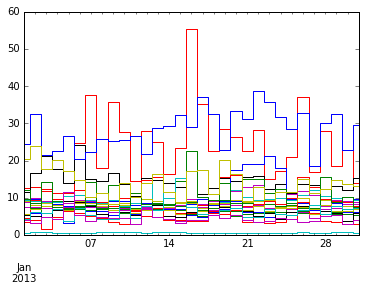

In [43]:
blie=bla.sum()['2013-01-01':'2013-1-31'].iloc[:,:20].plot(drawstyle='steps-mid')
plt.legend().remove()

Now plot consumption levels for the first week of December (in kW, hence the factor 2 from kWh/30 minutes). Shown are:
- mean
- median (50% quantile)
- 5% quantile
- 95% quantile

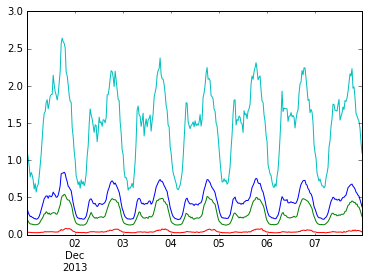

In [52]:
d_select = c_d_trial['2013-12-1':'2013-12-07']
(d_select.mean(1)*2).plot()
(d_select.median(1)*2).plot()
(d_select.quantile(0.05,axis=1)*2).plot()
(d_select.quantile(0.95,axis=1)*2).plot()


household mean annual energy consumption, for control and dtou groups (in kWh)

Note that the first two methods first average over households and then sum over all settlement blocks. This has the effect of filling missing data with average consumption values at that time. The other approach (below) sums over all measurement values for each household (so that missing values are 0) and then takes the mean. The resulting value is slightly lower.

In [56]:
consumption_n['2013'].mean(1).sum()

3670.264451721942

In [53]:
consumption_d['2013'].mean(1).sum()

3456.0730886846363

3435.834721951221

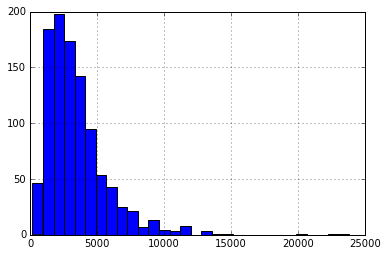

In [43]:
consumption_d['2013'].sum(0).hist(bins=30)
consumption_d['2013'].sum(0).mean()

yet another way to take the average and compute the mean consumption...

In [59]:
consumption_n['2013'].mean(0).mean()*365*48

3688.4700263906443

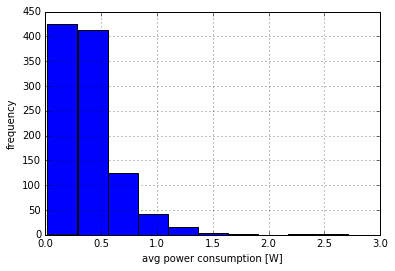

In [61]:
(c_d_trial.mean()*2).hist()
plt.xlabel('avg power consumption [W]')
plt.ylabel('frequency')

Another way to quickly select data for analysis.

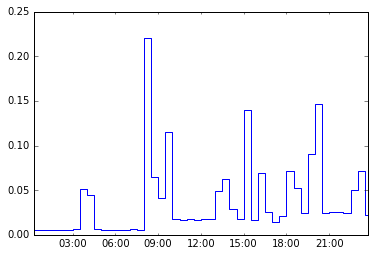

In [63]:
consumption_d['D1016']['2013-01-1'].plot(drawstyle='steps-mid')

Create new tables where consumption has been multiplied by the tariffs to get half-hourly costs. Three tables:
cost_d : actual cost for people in the trial
cost_d_hyp : hypothetical cost on a flat tariff
cost_n : cost for control group on a flat tariff [note: they may not actually have been on this tariff!]

In [32]:
cost_d = consumption_d['2013'].mul(tariff['2013']['Price'], axis='index')
cost_d_hyp = consumption_d['2013']*0.14228
cost_n = consumption_n['2013']*0.14228

show the first couple of rows

In [33]:
cost_d.head()

,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D1015,D1016,D1017,D1018,D1019,D1020,D1021,D1022,D1023,D1024
2013-01-01 00:15:00,0.047510,0.029165,0.026695,0.009173,0.023755,0.007762,0.018934,0.016111,0.020698,0.005410,...,0.003763,0.000588,0.027754,0.006350,0.023050,0.098549,0.009526,0.019522,0.012936,0.006821
2013-01-01 00:45:00,0.021756,0.024226,0.027166,0.008938,0.022109,0.006703,0.026695,0.019286,0.021991,0.005527,...,0.005410,0.000588,0.033986,0.007056,0.025637,0.052450,0.004586,0.017052,0.011760,0.010231
2013-01-01 01:15:00,0.017758,0.020110,0.027754,0.009055,0.004586,0.006115,0.016229,0.015994,0.040102,0.008820,...,0.001882,0.000588,0.028106,0.006703,0.021286,0.048216,0.006938,0.015641,0.027518,0.004704
2013-01-01 01:45:00,0.016346,0.007997,0.028106,0.009055,0.002822,0.008232,0.004704,0.012113,0.010231,0.005410,...,0.001882,0.000588,0.014112,0.030929,0.020462,0.033163,0.005762,0.005762,0.006586,0.009761
2013-01-01 02:15:00,0.012348,0.009761,0.029518,0.009055,0.011995,0.004469,0.002352,0.011054,0.007409,0.005410,...,0.001882,0.000588,0.011407,0.005527,0.022109,0.028106,0.003998,0.004586,0.012466,0.006233


In [106]:
(cost_d_hyp.mean(0)*48*365).mean()

491.58590662019617

In [100]:
(cost_n.mean(0)*48*365).mean()

516.3858036946907

In [68]:
(cost_d.mean(0)*48*365).mean()

471.3366079294177

Plot the distribution of differences between actual costs and hypothetical (no-trial) costs. Averaging is done over hours of the year - effectively assuming that dropouts occur at random times. Result suggests that most people saved money

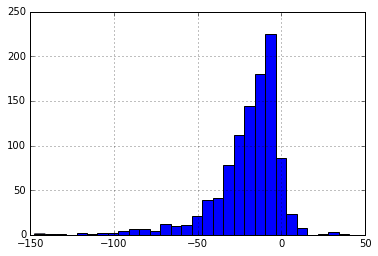

In [67]:
((cost_d.mean(0)-cost_d_hyp.mean(0))*48*365).hist(bins=30)

as above, but expressed as percentage savings.

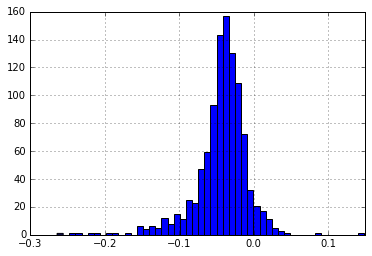

In [116]:
((cost_d.mean(0)-cost_d_hyp.mean(0))/cost_d_hyp.mean(0)).hist(bins=50)

Comparison of average monthly bills between dtou and control groups

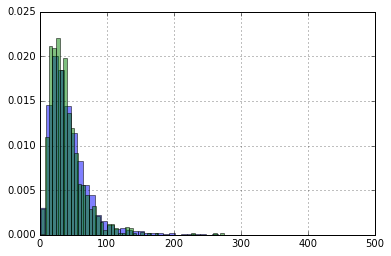

In [104]:
(cost_n.mean(0)*48*365/12).hist(bins=50,normed=1,alpha=0.5)
(cost_d.mean(0)*48*365/12).hist(bins=50,normed=1,alpha=0.5)
